In [1]:
# import libraries

from nba_api.stats.static import players, teams
from nba_api.stats.endpoints import playercareerstats, leaguegamefinder
import pandas as pd
import matplotlib.pyplot as plt

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# get all current players
all_players = players.get_players()

# show first 3 players
print(f"Total players in database: {len(all_players)}")
print("\nFirst 3 players:")
for i in range(3):
    print(all_players[i])


Total players in database: 5135

First 3 players:
{'id': 76001, 'full_name': 'Alaa Abdelnaby', 'first_name': 'Alaa', 'last_name': 'Abdelnaby', 'is_active': False}
{'id': 76002, 'full_name': 'Zaid Abdul-Aziz', 'first_name': 'Zaid', 'last_name': 'Abdul-Aziz', 'is_active': False}
{'id': 76003, 'full_name': 'Kareem Abdul-Jabbar', 'first_name': 'Kareem', 'last_name': 'Abdul-Jabbar', 'is_active': False}


In [3]:
# find a specific player
lebron = players.find_players_by_full_name('LeBron James')
print(lebron)

# get his id
lebron_id = lebron[0]['id']
print(f"\nLebron's ID: {lebron_id}")

[{'id': 2544, 'full_name': 'LeBron James', 'first_name': 'LeBron', 'last_name': 'James', 'is_active': True}]

Lebron's ID: 2544


In [4]:
# get LeBron's career stats
career = playercareerstats.PlayerCareerStats(player_id=lebron_id)
career_df = career.get_data_frames()[0]
print(career_df.head())

   PLAYER_ID SEASON_ID LEAGUE_ID     TEAM_ID TEAM_ABBREVIATION  PLAYER_AGE  \
0       2544   2003-04        00  1610612739               CLE        19.0   
1       2544   2004-05        00  1610612739               CLE        20.0   
2       2544   2005-06        00  1610612739               CLE        21.0   
3       2544   2006-07        00  1610612739               CLE        22.0   
4       2544   2007-08        00  1610612739               CLE        23.0   

   GP  GS   MIN  FGM  ...  FT_PCT  OREB  DREB  REB  AST  STL  BLK  TOV   PF  \
0  79  79  3120  622  ...   0.754    99   333  432  465  130   58  273  149   
1  80  80  3388  795  ...   0.750   111   477  588  577  177   52  262  146   
2  79  79  3361  875  ...   0.738    75   481  556  521  123   66  260  181   
3  78  78  3190  772  ...   0.698    83   443  526  470  125   55  250  171   
4  75  74  3027  794  ...   0.712   133   459  592  539  138   81  255  165   

    PTS  
0  1654  
1  2175  
2  2478  
3  2132  
4  225

In [5]:
# look at what columns we have
print("Available columns:")
print(career_df.columns.tolist())

Available columns:
['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


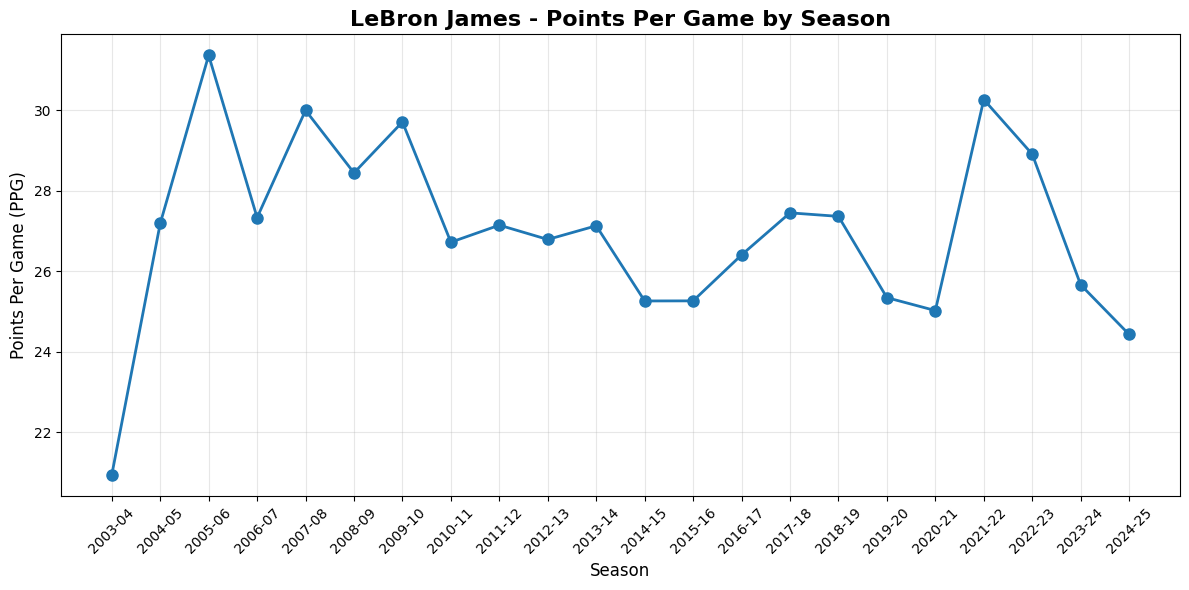


Chart saved to visualizations/lebron_ppg.png


In [6]:
# create points per game chart
# calculate points per game (PTS / GP)
career_df['PPG'] = career_df['PTS'] / career_df['GP']

# create plot
plt.figure(figsize=(12,6)) # fig size 12in wide 6in tall
plt.plot(career_df['SEASON_ID'], career_df['PPG'], marker='o' , linewidth=2, markersize=8)
plt.title("LeBron James - Points Per Game by Season", fontsize=16, fontweight='bold')
plt.xlabel("Season", fontsize=12)
plt.ylabel("Points Per Game (PPG)", fontsize=12)
plt.xticks(rotation=45) # rotate season labels so they don't overlap
plt.grid(True, alpha=0.3) # add grid with some transparency
plt.tight_layout() # adjust layout to fit everything

# save plot
plt.savefig('../visualizations/Lebron_ppg.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved to visualizations/lebron_ppg.png")

Found Tyler Herro with ID: 1629639


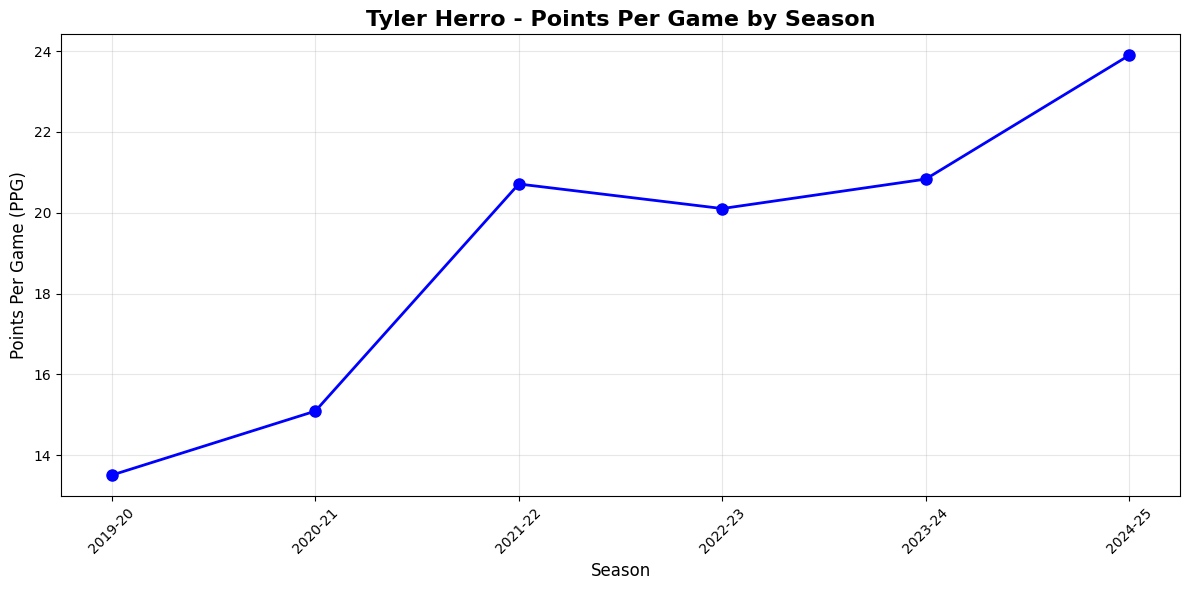

In [7]:
# keep requesting input till player is found
while True:

    # pick player
    player_name = input("Enter a player's full name (e.g., 'Stephen Curry'): ")

    # find player
    player_info = players.find_players_by_full_name(player_name)
    if len(player_info) == 0:
        print(f"No player found with the name '{player_name}'. Check the spelling and try again.")
    else:
        player_id = player_info[0]['id']
        print(f"Found {player_name} with ID: {player_id}")

        # stats
        stats = playercareerstats.PlayerCareerStats(player_id=player_id)
        stats_df = stats.get_data_frames()[0]

        # PPG
        stats_df['PPG'] = stats_df['PTS'] / stats_df['GP']

        # plot stats
        plt.figure(figsize=(12,6))
        plt.plot(stats_df['SEASON_ID'], stats_df['PPG'], marker='o', linewidth=2, markersize=8, color='blue')
        plt.title(f"{player_name} - Points Per Game by Season", fontsize=16, fontweight='bold')
        plt.xlabel("Season", fontsize=12)
        plt.ylabel("Points Per Game (PPG)", fontsize=12)
        plt.xticks(rotation=45) # rotate season labels
        plt.grid(True, alpha=0.3) # add grid
        plt.tight_layout()
        plt.show()

        # exit loop after successful plot
        break